<a href="https://colab.research.google.com/github/adeepH/DravidianOffensive/blob/main/Notebooks/Kannada/ULMFiT_Kannada_offensive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
!git clone https://github.com/adeepH/DravidianOffensive.git

Cloning into 'DravidianOffensive'...
remote: Enumerating objects: 160, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 160 (delta 70), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (160/160), 10.23 MiB | 3.32 MiB/s, done.
Resolving deltas: 100% (70/70), done.


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
train = pd.read_csv('/content/DravidianOffensive/Datasets/Pseudo Labels/Pseudo_kan.csv')
train[0]=train['tweets']
train[1]=train['labels']
train=train.drop(columns=['Unnamed: 0','tweets','labels'])
print(train)


                                                       0  1
0      Tik tok alli jagala madtidralla adra baggenu o...  0
1                                Anyone from kerala here  5
2                              Movie rerelease madi plss  0
3      Amazon prime alli bittidira....yella manele no...  0
4      Guru sure news nanu tik tok dawn lod madeda ya...  0
...                                                  ... ..
14761  {'kn': '1ಎಟ್ ತೆಲೆಗ್ರಾಂ ಅಪ್ಪಿ ಕ್ಲೋಸ್ ಮಾಡ್ಸಿ ಆಮೇ...  0
14762                        {'kn': 'ಸೂಪರ್ ತೊಗರಿ ಟಿಪ್ಪ'}  0
14763       ಭಾರತ್ರಜ್ ತ್ ಬಿಎ ಕಿಟ್ಕೋಬೇಕಷ್ಟೆ ನೀನು ಬಂದಿ ನಂದು  0
14764  {'kn': 'ರಶ್ಮಿಕ ಎಲ್ಲಿಡ್ಡೆಯಕ್ಕ🤣🥀ನಂಕ್ರಾಕ್ಷಿತ್ ಶೆಟ...  0
14765        {'kn': 'ಸೂಪರ್ ಸಾಂಗ್ ಬ್ರೋ ಸೂಪರ್ರ್......ಬಿಎ'}  0

[14766 rows x 2 columns]


In [9]:
test = pd.read_csv('/content/kannada_offensive_test_with_labels.csv', sep='\t',  header=None, error_bad_lines=False)
test['labels']=LabelEncoder().fit_transform(test[1])
test[1]=test['labels']
test=test.drop(columns=['labels'])
test

b'Skipping line 778: expected 2 fields, saw 3\n'


,0,1
0,ಜೈ ಮೋರಿ ಜೈ ರೋಗಿ ಇಸ್ಲಾಂ ಸಾಯಿಸಿ ಇದೆ ಇವರ ಗುರಿ,1
1,Anna nim e vedio nodinu mathe chaina apps use ...,1
2,Super anna yenu thappila yela sari agi hellidi...,0
3,Super sir super super super super,5
4,AGT-KELU (KANNADA RAP 2019),5
...,...,...
772,Super movie 🤩,5
773,Startup start maadalu capacity growth maadalu ...,0
774,Rashmika idanna nodi thi*a urkimbeku🤣🤣🤣🤣🤣,2
775,I love you sir,5


In [10]:
df=train.filter([1,0], axis=1)
df_test=test.filter([1,0],axis=1)

In [11]:
import fastai
from fastai import *
from fastai.text import * 
from functools import partial
import io
import os

In [12]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df, valid_df = df_test, path = "")

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [13]:
data_lm.show_batch

<bound method DataBunch.show_batch of TextLMDataBunch;

Train: LabelList (14766 items)
x: LMTextList
xxbos xxmaj tik tok alli jagala xxunk adra xxunk ondu video madi anna super agi xxunk,xxbos xxmaj anyone from kerala here,xxbos xxmaj movie rerelease madi plss,xxbos xxmaj amazon prime alli xxunk xxrep 4 . yella manele nodtare xxrep 4 .,xxbos xxmaj guru sure news nanu tik tok xxunk xxunk xxunk yavaga nama xxunk tindu nama xxunk xxunk xxunk xxunk xxunk avaga xxunk
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (777 items)
x: LMTextList
xxbos ಜೈ ಮೋರಿ ಜೈ xxunk ಇಸ್ಲಾಂ xxunk ಇದೆ ಇವರ ಗುರಿ,xxbos xxmaj anna nim e vedio xxunk mathe chaina apps use madidre ... nijakku avru maryade xxunk xxunk bharatha dalli xxunk xxrep 4 . xxunk xxunk maryade xxunk xxrep 5 .,xxbos xxmaj super anna yenu xxunk yela sari agi xxunk super,xxbos xxmaj super sir super super super super,xxbos xxup xxunk - xxup kelu ( xxup kannada xxup xxunk 2019 )
y: LMLabelList
,,,,
Path: .;

Test: None>

In [14]:
#loading AWD_LSTM language model
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.03E-02
Min loss divided by 10: 5.22E-03


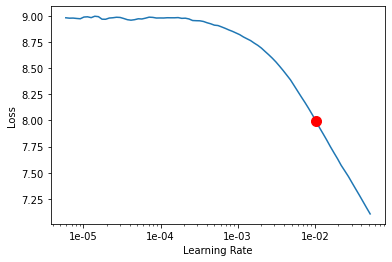

In [15]:
learn.lr_find(start_lr=2e-6, end_lr=1e-1)
learn.recorder.plot(suggestion = True)

In [16]:
#fitting the data
learn.fit_one_cycle(2, 5e-2)
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,5.349760,4.860466,0.259598,00:05
1,4.126575,4.553589,0.284263,00:05


In [17]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.379515,4.506907,0.279129,00:06
1,3.054703,4.186895,0.295201,00:06
2,2.473958,4.148688,0.309933,00:06


In [18]:
learn.freeze_to(-1)
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 8.32E-04
Min loss divided by 10: 1.74E-04


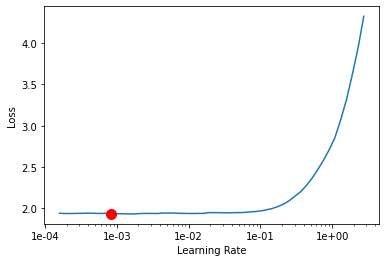

In [19]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [20]:
learn.fit_one_cycle(3, slice(2e-2/(2.6**4), 2e-2))

epoch,train_loss,valid_loss,accuracy,time
0,2.083406,4.192125,0.306808,00:05
1,1.972571,4.141481,0.315402,00:05
2,1.722368,4.116198,0.327455,00:05


In [21]:
learn.freeze_to(-2)
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.58E-04
Min loss divided by 10: 9.12E-04


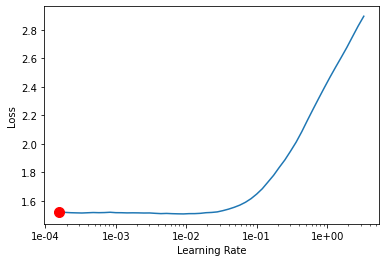

In [22]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [23]:
learn.fit_one_cycle(3, slice(6e-3/(2.6**4), 6e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.542517,4.186406,0.324777,00:05
1,1.482684,4.174247,0.336942,00:05
2,1.378708,4.191644,0.336161,00:05


In [24]:
#save the encoder model
learn.save_encoder('my_encoder')

In [25]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df, valid_df = df_test, vocab=data_lm.train_ds.vocab, bs=32)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [26]:
#building classifier
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, metrics=[accuracy, FBeta(beta=1)])

#loading the saved encoder
learn.load_encoder('my_encoder')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (14766 items)
x: TextList
xxbos xxmaj tik tok alli jagala xxunk adra xxunk ondu video madi anna super agi xxunk,xxbos xxmaj anyone from kerala here,xxbos xxmaj movie rerelease madi plss,xxbos xxmaj amazon prime alli xxunk xxrep 4 . yella manele nodtare xxrep 4 .,xxbos xxmaj guru sure news nanu tik tok xxunk xxunk xxunk yavaga nama xxunk tindu nama xxunk xxunk xxunk xxunk xxunk avaga xxunk
y: CategoryList
0,5,0,0,0
Path: .;

Valid: LabelList (777 items)
x: TextList
xxbos ಜೈ ಮೋರಿ ಜೈ xxunk ಇಸ್ಲಾಂ xxunk ಇದೆ ಇವರ ಗುರಿ,xxbos xxmaj anna nim e vedio xxunk mathe chaina apps use madidre ... nijakku avru maryade xxunk xxunk bharatha dalli xxunk xxrep 4 . xxunk xxunk maryade xxunk xxrep 5 .,xxbos xxmaj super anna yenu xxunk yela sari agi xxunk super,xxbos xxmaj super sir super super super super,xxbos xxup xxunk - xxup kelu ( xxup kannada xxup xxunk 2019 )
y: CategoryList
1,1,0,5,5
Path: .;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncode

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.00E-01
Min loss divided by 10: 3.02E-02


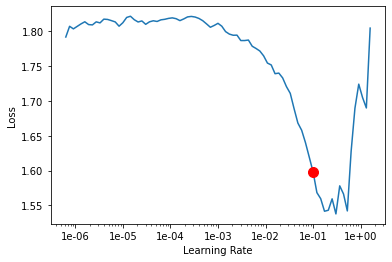

In [27]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [28]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.666276,0.952021,0.643501,0.355950,00:05
1,0.529242,0.891685,0.679537,0.000000,00:06
2,0.499790,0.856064,0.692407,0.000000,00:05


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

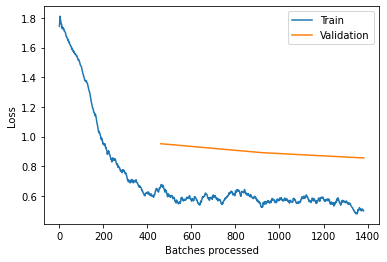

In [29]:
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06
Min loss divided by 10: 6.31E-08


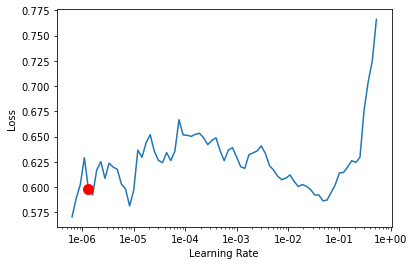

In [30]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [31]:
learn.freeze_to(-2) # unfreeze last 2 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.528018,0.882029,0.688546,0.382532,00:06
1,0.511045,0.844622,0.705277,0.000000,00:06


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 2.75E-07


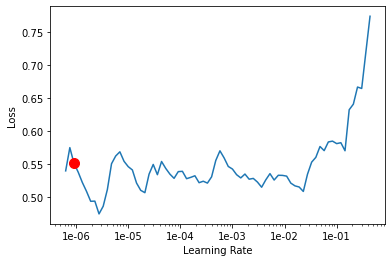

In [32]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [33]:
learn.freeze_to(-3)
learn.fit_one_cycle(2, slice(5.3e-3/(2.6**4),5.31e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.499353,0.846661,0.706564,0.402316,00:10
1,0.398617,0.842696,0.715573,0.000000,00:10


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

In [34]:
learn.freeze_to(-4) # unfreeze last 4 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))
learn.freeze_to(-5) # unfreeze last 5 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

# Unfreezing all the layers and training
learn.unfreeze() # unfreze all
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.414035,0.887697,0.711712,0.426902,00:13
1,0.340860,0.892919,0.714286,0.456246,00:12


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.366805,0.917885,0.693694,0.429448,00:13
1,0.255319,0.980196,0.715573,0.458703,00:13


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.215547,1.033512,0.719434,0.476279,00:14
1,0.203005,1.092546,0.716860,0.477726,00:13
2,0.160417,1.155464,0.710425,0.478353,00:14


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

In [35]:
#getting the predictions
preds, targets = learn.get_preds()
predictions = np.argmax(preds, axis = 1)

In [36]:
pd.crosstab(predictions, targets)

col_0,0,1,2,3,4,5
row_0,,,,,,
0,350,23,25,8,26,38
1,11,10,1,2,2,1
2,9,7,45,1,1,2
3,0,2,1,2,0,0
4,2,1,2,0,2,1
5,54,1,1,1,2,143


In [37]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
cm=confusion_matrix(predictions,targets)
print(cm)
score = accuracy_score( predictions, targets)
print(score)

[[350  23  25   8  26  38]
 [ 11  10   1   2   2   1]
 [  9   7  45   1   1   2]
 [  0   2   1   2   0   0]
 [  2   1   2   0   2   1]
 [ 54   1   1   1   2 143]]
0.7104247104247104


In [38]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(predictions,targets, zero_division=0, digits=4))

              precision    recall  f1-score   support

           0     0.8216    0.7447    0.7812       470
           1     0.2273    0.3704    0.2817        27
           2     0.6000    0.6923    0.6429        65
           3     0.1429    0.4000    0.2105         5
           4     0.0606    0.2500    0.0976         8
           5     0.7730    0.7079    0.7390       202

    accuracy                         0.7104       777
   macro avg     0.4376    0.5275    0.4588       777
weighted avg     0.7576    0.7104    0.7306       777

